In [1]:
import time
import numpy as np
from GEECSPythonAPI import GEECSDevice

In [2]:
##List of of device names
#[unique alias,device name,scale,command,read back]
b_cave_steerers=[['S1H','U_S1H',5,'Current','Current'],['S1V','U_S1V',5,'Current','Current'],
                 ['S2H','U_S2H',5,'Current','Current'],['S2V','U_S2V',5,'Current','Current'],
                 ['S3H','U_S3H',5,'Current','Current'],['S3V','U_S3V',5,'Current','Current'],
                 ['S4H','U_S4H',5,'Current','Current'],['S4V','U_S4V',5,'Current','Current']]

visa_steerers=[['VS1H','U_VS1H',5,'Current','Current'],['VS1V','U_VS1V',5,'Current','Current'],
                 ['VS2H','U_VS2H',5,'Current','Current'],['VS2V','U_VS2V',5,'Current','Current'],
                 ['VS3H','U_VS3H',5,'Current','Current'],['VS3V','U_VS3V',5,'Current','Current'],
                 ['VS4H','U_VS4H',5,'Current','Current'],['VS4V','U_VS4V',5,'Current','Current'],
                ['VS5H','U_VS5H',5,'Current','Current'],['VS5V','U_VS5V',5,'Current','Current']]

chicane_magnets=[['U_ChicaneInner','U_ChicaneInner',7,'Current','Current'],
                 ['U_ChicaneOuter','U_ChicaneOuter',7,'Current','Current']]

triplet=[["EMQ1",'U_EMQTripletBipolar',4,'Current_Limit.Ch1','Current.Ch1'],
         ["EMQ2",'U_EMQTripletBipolar',4,'Current_Limit.Ch2','Current.Ch2'],
         ["EMQ3",'U_EMQTripletBipolar',4,'Current_Limit.Ch3','Current.Ch3']]

magnet_names=b_cave_steerers+visa_steerers+chicane_magnets+triplet
magnet_names=chicane_magnets
magnets=dict({})

#loop to make a dict of initialized device objects stored in a dict
for dev in magnet_names:
    magnets[dev[0]]=dict({'alias':dev[0],'object':GEECSDevice(device_name=dev[1]),'amplitude':dev[2],'command':dev[3],'readback':dev[4]})
    magnets[dev[0]]['object'].device_initialize()
    magnets[dev[0]]['readback_vals']=[]
    

#some math to create a list of an exponentially decaying sine wave    
degaussAmp=4.9
x=np.linspace(0,16,129)
y=0.95*np.sin(2*np.pi*x)*np.exp(-x/4)

t0=time.monotonic()
#loop for executing degauss commands. top level loop goes throught current values to set. 
#The second loop goes through and checks the values. 
allGetVals=np.array([])
for value in y:    
    
    #this loop just sends all the commands (waits until command is accepted, i.e. "no error")
    #It doesn't wait to get a value back. This allows the commands to get sent out "asynchronously"
    for item in magnets:
        print('set value: '+str(value*magnets[item]['amplitude']))
        magnets[item]['object'].set_only_udp(magnets[item]['command'],value*magnets[item]['amplitude'])
    
    #this loop starts by reading the 'slow' udp response from the 'set' command above
    #after that, it sends a get command to retrieve the actual value
    for item in magnets:
        msg=magnets[item]['object'].read_slow_udp()
        val=float(magnets[item]['object'].get_and_wait_udp(magnets[item]['readback']))
        allGetVals=np.append(allGetVals,float(val))
        magnets[item]['readback_vals'].append(val)
        
t1=time.monotonic()
print(t1-t0)

55880
55882
set value: 0.0
set value: 0.0
b'U_ChicaneInner>>getCurrent>>-0.000012>>no error,'
b'U_ChicaneOuter>>getCurrent>>0.000034>>no error,'
set value: 4.557586761119801
set value: 4.557586761119801
b'U_ChicaneInner>>getCurrent>>4.553174>>no error,'
b'U_ChicaneOuter>>getCurrent>>4.562467>>no error,'
set value: 6.2470968677096135
set value: 6.2470968677096135
b'U_ChicaneInner>>getCurrent>>4.557571>>no error,'
b'U_ChicaneOuter>>getCurrent>>4.554934>>no error,'
set value: 4.2814565383017005
set value: 4.2814565383017005
b'U_ChicaneInner>>getCurrent>>4.281045>>no error,'
b'U_ChicaneOuter>>getCurrent>>4.280503>>no error,'
set value: 7.186967596601061e-16
set value: 7.186967596601061e-16
b'U_ChicaneInner>>getCurrent>>0.009408>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.032796>>no error,'
set value: -4.022056199948781
set value: -4.022056199948781
b'U_ChicaneInner>>getCurrent>>-4.017036>>no error,'
b'U_ChicaneOuter>>getCurrent>>-4.023931>>no error,'
set value: -5.5130436358996615
set val

b'U_ChicaneInner>>getCurrent>>1.392666>>no error,'
b'U_ChicaneOuter>>getCurrent>>1.393004>>no error,'
set value: 0.9553220830598026
set value: 0.9553220830598026
b'U_ChicaneInner>>getCurrent>>0.956541>>no error,'
b'U_ChicaneOuter>>getCurrent>>0.956310>>no error,'
set value: -2.567427833334998e-15
set value: -2.567427833334998e-15
b'U_ChicaneInner>>getCurrent>>-0.005288>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.002601>>no error,'
set value: -0.897442044020556
set value: -0.897442044020556
b'U_ChicaneInner>>getCurrent>>-0.896761>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.896077>>no error,'
set value: -1.2301263093835733
set value: -1.2301263093835733
b'U_ChicaneInner>>getCurrent>>-1.229031>>no error,'
b'U_ChicaneOuter>>getCurrent>>-1.229350>>no error,'
set value: -0.8430687792709365
set value: -0.8430687792709365
b'U_ChicaneInner>>getCurrent>>-0.844103>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.843928>>no error,'
set value: -1.9812769607189653e-15
set value: -1.9812769607189653e-1

b'U_ChicaneInner>>getCurrent>>-0.000033>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.000055>>no error,'
set value: -0.20024638700624062
set value: -0.20024638700624062
b'U_ChicaneInner>>getCurrent>>-0.200029>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.200131>>no error,'
set value: -0.2744782804155537
set value: -0.2744782804155537
b'U_ChicaneInner>>getCurrent>>-0.274329>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.274379>>no error,'
set value: -0.1881140717348669
set value: -0.1881140717348669
b'U_ChicaneInner>>getCurrent>>-0.188242>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.188238>>no error,'
set value: 1.0111130312557374e-15
set value: 1.0111130312557374e-15
b'U_ChicaneInner>>getCurrent>>0.000019>>no error,'
b'U_ChicaneOuter>>getCurrent>>-0.000011>>no error,'
set value: 0.17671681628676408
set value: 0.17671681628676408
b'U_ChicaneInner>>getCurrent>>0.176550>>no error,'
b'U_ChicaneOuter>>getCurrent>>0.176600>>no error,'
set value: 0.24222623229347215
set value: 0.24222623229347215

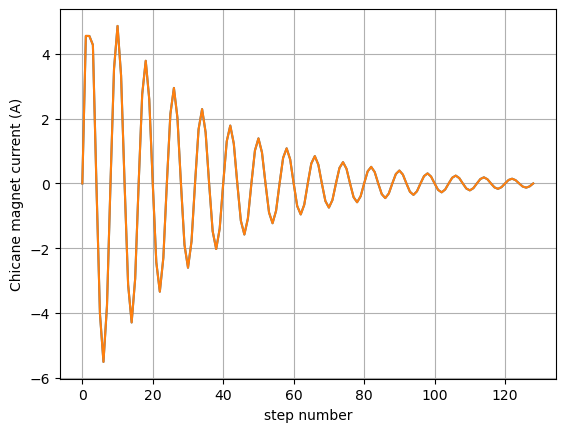

In [4]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.plot(magnets['EMQ1']['readback_vals'])
# ax.plot(magnets['EMQ2']['readback_vals'])
# ax.plot(magnets['EMQ3']['readback_vals'])

# ax.set(xlabel='step number', ylabel='EMQ currents (A)')
# ax.grid()

# plt.show()

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.plot(magnets['S1H']['readback_vals'])
# ax.plot(magnets['S1V']['readback_vals'])
# ax.plot(magnets['S2H']['readback_vals'])
# ax.plot(magnets['S2V']['readback_vals'])
# ax.plot(magnets['S3H']['readback_vals'])
# ax.plot(magnets['S3V']['readback_vals'])
# ax.plot(magnets['S4H']['readback_vals'])
# ax.plot(magnets['S4V']['readback_vals'])


# ax.set(xlabel='step number', ylabel='B-cave steering magnet current (A)')
# ax.grid()

# plt.show()

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.plot(magnets['VS1H']['readback_vals'])
# ax.plot(magnets['VS1V']['readback_vals'])
# ax.plot(magnets['VS2H']['readback_vals'])
# ax.plot(magnets['VS2V']['readback_vals'])
# ax.plot(magnets['VS3H']['readback_vals'])
# ax.plot(magnets['VS3V']['readback_vals'])
# ax.plot(magnets['VS4H']['readback_vals'])
# ax.plot(magnets['VS4V']['readback_vals'])
# ax.plot(magnets['VS5H']['readback_vals'])
# ax.plot(magnets['VS5V']['readback_vals'])

# ax.set(xlabel='step number', ylabel='VISA steering magnet current (A)')
# ax.grid()

# plt.show()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(magnets['U_ChicaneInner']['readback_vals'])
ax.plot(magnets['U_ChicaneOuter']['readback_vals'])

ax.set(xlabel='step number', ylabel='Chicane magnet current (A)')
ax.grid()

plt.show()

magnets['EMQ1']['readback_vals']

In [102]:
float(magnets['EMQ1']['readback_vals'][1])

2.8669